In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train (1).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df=df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [5]:
df.shape

(891, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 45.3+ KB


In [7]:
df['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

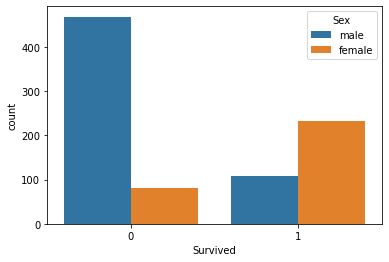

In [12]:
sns.countplot(x='Survived', data=df, hue='Sex')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

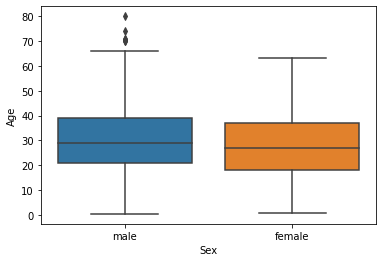

In [13]:
sns.boxplot(x='Sex', y='Age', data=df)

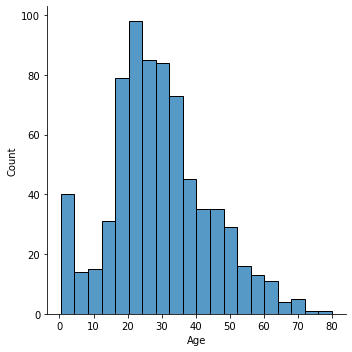

In [14]:
sns.displot(x='Age',data=df)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

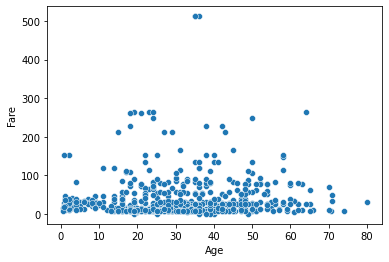

In [15]:
sns.scatterplot(x='Age',y='Fare',data=df)

In [17]:
df.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


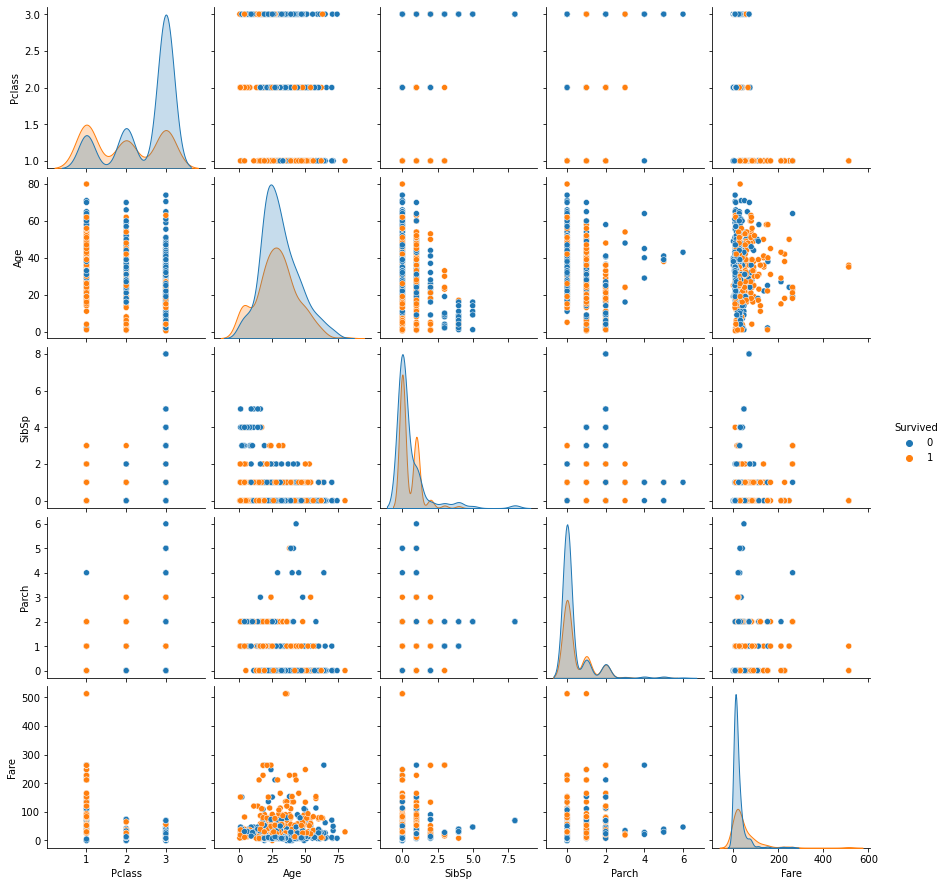

In [18]:
sns.pairplot(df, hue='Survived')

In [20]:
df[df['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,0,3,male,NaN,0,0,8.4583
17,1,2,male,NaN,0,0,13.0000
19,1,3,female,NaN,0,0,7.2250
26,0,3,male,NaN,0,0,7.2250
28,1,3,female,NaN,0,0,7.8792
...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292
863,0,3,female,NaN,8,2,69.5500
868,0,3,male,NaN,0,0,9.5000
878,0,3,male,NaN,0,0,7.8958


<AxesSubplot:xlabel='Age'>

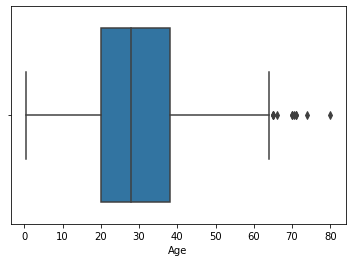

In [21]:
sns.boxplot(x='Age',data=df)

In [23]:
df['Age'].median()

28.0

In [24]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [25]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [29]:
pd.get_dummies(df, drop_first=True)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,28.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [31]:
df.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [33]:
df.sort_values('Survived',ascending=False)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
445,1,1,male,4.0,0,2,81.8583
319,1,1,female,40.0,1,1,134.5000
334,1,1,female,28.0,1,0,133.6500
330,1,3,female,28.0,2,0,23.2500
329,1,1,female,16.0,0,1,57.9792
...,...,...,...,...,...,...,...
365,0,3,male,30.0,0,0,7.2500
371,0,3,male,18.0,1,0,6.4958
372,0,3,male,19.0,0,0,8.0500
373,0,1,male,22.0,0,0,135.6333


In [34]:
df=pd.get_dummies(df,drop_first=True)

In [35]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [36]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
X=df.drop('Survived',axis=1)

In [39]:
y=df['Survived']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [43]:
scaled_X_train=scaler.fit_transform(X_train)

In [44]:
scaled_X_test=scaler.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
log_reg=LogisticRegression()

In [47]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [49]:
#help(LogisticRegression)

In [50]:
log_reg.fit(scaled_X_train,y_train)

LogisticRegression()

In [52]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [53]:
print(classification_report(y_test,log_reg.predict(scaled_X_test)))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [61]:
print(classification_report(y_train,log_reg.predict(scaled_X_train)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       392
           1       0.76      0.68      0.71       231

    accuracy                           0.80       623
   macro avg       0.79      0.77      0.78       623
weighted avg       0.80      0.80      0.80       623



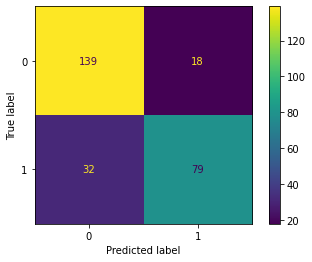

In [54]:
plot_confusion_matrix(log_reg,scaled_X_test,y_test)

In [55]:
len(y_test)

268

In [56]:
log_reg.coef_

array([[-0.75094721, -0.44277737, -0.35401073, -0.10081339,  0.18437956,
        -1.23603463]])

In [60]:
pd.DataFrame(log_reg.coef_, columns=X.columns)

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,-0.750947,-0.442777,-0.354011,-0.100813,0.18438,-1.236035


In [62]:
from sklearn.model_selection import GridSearchCV

In [98]:
base_model=LogisticRegression(multi_class='ovr')

In [73]:
#help(LogisticRegression)

In [97]:
param_grid={'C':[0.001,0.1,0.2,0.3,0.4,0.5,0.55,0.7,0.9,0.99,1],
           'penalty':['l1','l2'],
           'solver':['liblinear','saga']}

In [99]:
grid=GridSearchCV(base_model,param_grid)

In [100]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.7, 0.9,
                               0.99, 1],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [101]:
grid.best_params_

{'C': 0.2, 'penalty': 'l1', 'solver': 'saga'}

In [102]:
print(classification_report(y_test, grid.predict(scaled_X_test)))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [71]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [130]:
tree=DecisionTreeClassifier(max_depth=4)

In [132]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [133]:
print(classification_report(y_test,tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.72      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [134]:
print(classification_report(y_train,tree.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       392
           1       0.81      0.76      0.79       231

    accuracy                           0.85       623
   macro avg       0.84      0.83      0.83       623
weighted avg       0.85      0.85      0.85       623



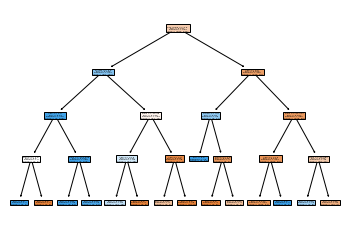

In [135]:
plot_tree(tree, feature_names=X.columns, filled=True);

In [85]:
tree.feature_importances_

array([0.1780081 , 0.11333526, 0.0452077 , 0.00257594, 0.10329824,
       0.55757477])

In [108]:
base_tree=DecisionTreeClassifier()

In [111]:
#help(DecisionTreeClassifier)

In [146]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':list(range(1,5)),
           'max_leaf_nodes':list(range(1,5))}

In [147]:
grid_model=GridSearchCV(base_tree,param_grid,verbose=2)

In [148]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......criterion=gini, max_depth=1, max_leaf_nodes=1; total time=   0.0s
[CV] END ......criterion=gini, max_depth=1, max_leaf_nodes=1; total time=   0.0s
[CV] END ......criterion=gini, max_depth=1, max_leaf_nodes=1; total time=   0.0s
[CV] END ......criterion=gini, max_depth=1, max_leaf_nodes=1; total time=   0.0s
[CV] END ......criterion=gini, max_depth=1, max_leaf_nodes=1; total time=   0.0s
[CV] END ......criterion=gini, max_depth=1, max_leaf_nodes=2; total time=   0.0s
[CV] END ......criterion=gini, max_depth=1, max_leaf_nodes=2; total time=   0.0s
[CV] END ......criterion=gini, max_depth=1, max_leaf_nodes=2; total time=   0.0s
[CV] END ......criterion=gini, max_depth=1, max_leaf_nodes=2; total time=   0.0s
[CV] END ......criterion=gini, max_depth=1, max_leaf_nodes=2; total time=   0.0s
[CV] END ......criterion=gini, max_depth=1, max_leaf_nodes=3; total time=   0.0s
[CV] END ......criterion=gini, max_depth=1, max

[CV] END ...criterion=entropy, max_depth=3, max_leaf_nodes=2; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=3, max_leaf_nodes=2; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=3, max_leaf_nodes=3; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=3, max_leaf_nodes=3; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=3, max_leaf_nodes=3; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=3, max_leaf_nodes=3; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=3, max_leaf_nodes=3; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=3, max_leaf_nodes=4; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=3, max_leaf_nodes=4; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=3, max_leaf_nodes=4; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=3, max_leaf_nodes=4; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=3, max_leaf_nodes=4; total time=   0.0s
[CV] END ...criterion=entrop

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4],
                         'max_leaf_nodes': [1, 2, 3, 4]},
             verbose=2)

In [149]:
grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 4}

In [150]:
print(classification_report(y_test,grid_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.96      0.83       157
           1       0.89      0.51      0.65       111

    accuracy                           0.77       268
   macro avg       0.81      0.73      0.74       268
weighted avg       0.80      0.77      0.76       268



In [151]:
print(classification_report(y_train,grid_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       392
           1       0.92      0.52      0.66       231

    accuracy                           0.81       623
   macro avg       0.85      0.75      0.76       623
weighted avg       0.83      0.81      0.79       623

